<h1 style="font-size:32px; color:Black;">Step 1: Data Preprocessing</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import joblib  # For model saving/loading

# Load the dataset
data = pd.read_csv('supply_chain_data.csv')

# Display the first few rows of the dataset
display(data.head())


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


<h1 style="font-size:32px; color:Black;">Data Cleaning and Feature Engineering</h1>

In [3]:
# Handle missing values
data = data.dropna()

# 2) (Optional) If you know your data is regular daily, add dates:
data['Date'] = pd.date_range(start='2022-01-01', periods=len(data), freq='D')

# 3) Extract datetime features
data['Date'] = pd.to_datetime(data['Date'])
data['Month']     = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Quarter']   = data['Date'].dt.quarter
data = data.drop(columns=['Date'])

# 4) One-hot encode *all* remaining categorical columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

print(f"After encoding, feature columns = {data.shape[1] - 1}")  # minus target


# Define the target variable and features
target   = 'Number of products sold'
features = data.drop(columns=[target])

After encoding, feature columns = 138


<h1 style="font-size:32px; color:Black;">Step 2: Train/Test Split + Scaling</h1>

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    features, data[target], test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

<h1 style="font-size:32px; color:Black;">Step 3: Model Building</h1>

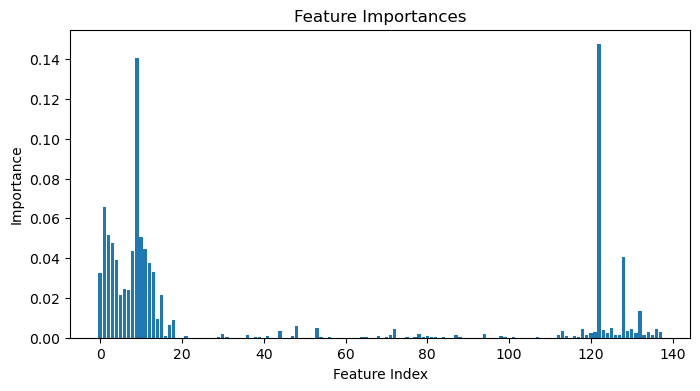

In [5]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# (Optional) Plot feature importances
importances = model.feature_importances_
plt.figure(figsize=(8,4))
plt.bar(range(len(importances)), importances)
plt.title("Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


<h1 style="font-size:32px; color:Black;">Step 4: Model Evaluation</h1>

Mean Squared Error on Test Set: 162706.44


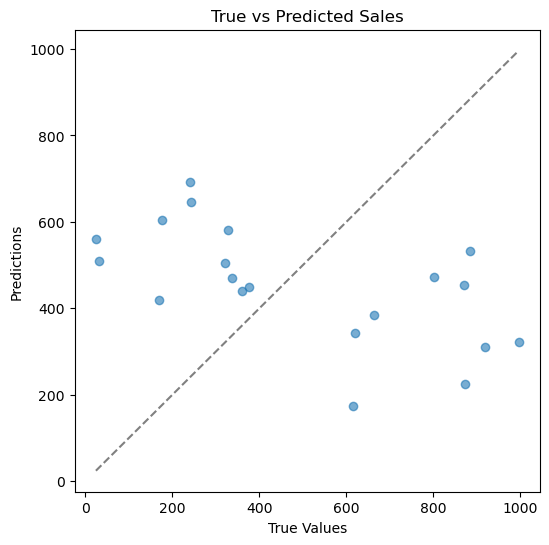

In [6]:
test_predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, test_predictions)
print(f'Mean Squared Error on Test Set: {mse:.2f}')

plt.figure(figsize=(6,6))
plt.scatter(y_test, test_predictions, alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Sales')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='gray')  # identity line
plt.show()


<h1 style="font-size:32px; color:Black;">Step 5: Model Deployment</h1>

In [7]:
# Save model & scaler
joblib.dump(model, 'demand_forecasting_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Load for future inference
loaded_model  = joblib.load('demand_forecasting_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Example prediction (adjust length to match your features!)
new_data = np.array([[0.5, 1.2, 0.3] + [0]* (features.shape[1]-3)])
new_data_scaled = loaded_scaler.transform(new_data)
predicted_sales = loaded_model.predict(new_data_scaled)
print(f'Predicted Sales: {predicted_sales[0]:.2f}')

Predicted Sales: 483.39


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
